In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
state_job_fig = "CSV Files/Total Jobs per State"
total_ind_state = "CSV Files/Total Worker per Category"
state_ind_breakdown = "CSV Files/Manufacturing Jobs by Industry"
state_lab_force = "CSV Files/BLS Civilian Labor Force By State.csv"
combined_cancer = "Cancer Incidence & Death Rates/Resource/Added_final_combined_cancer_data.csv"

In [3]:
state_job_df = pd.read_csv(state_job_fig)
total_ind_df = pd.read_csv(total_ind_state)
st_in_brk_df = pd.read_csv(state_ind_breakdown)
state_lab_df = pd.read_csv(state_lab_force)
cancer_rate_df = pd.read_csv(combined_cancer)

In [4]:
job_lab_df = pd.merge(state_job_df,state_lab_df, on="State" )
job_lab_df.head()

,State,Workers per State,Civilia Labor Force,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Alabama,128315,"2,181,837",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,3239,"353,728",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,56602,"3,252,711",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,76421,"1,327,435",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,517711,"19,192,788",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
job_lab_df= job_lab_df.rename(columns={"Civilia Labor Force":"Labor Force"})

In [6]:
job_lab_df = job_lab_df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9"])

In [7]:
job_lab_df.dtypes

State                object
Workers per State     int64
Labor Force          object
dtype: object

In [8]:
job_lab_df["Labor Force"]
job_lab_df['Labor Force'] = [int(x.replace(',','')) for x in list(job_lab_df['Labor Force'])]


#job_lab_df["Labor Force"] = job_lab_df["Labor Force"].convert_objects(convert_numeric=True)


In [9]:
job_lab_df["Manufacturing Percentage"] = (job_lab_df["Workers per State"]  / job_lab_df['Labor Force']) *100
job_lab_df.head()

,State,Workers per State,Labor Force,Manufacturing Percentage
0,Alabama,128315,2181837,5.881053
1,Alaska,3239,353728,0.915675
2,Arizona,56602,3252711,1.740148
3,Arkansas,76421,1327435,5.757043
4,California,517711,19192788,2.697425


In [10]:
job_lab_df.to_csv("CSV Files/Total Worker with Workforce Percentage", header=True)

In [11]:
state_job_ind = state_job_df.set_index("State")
state_job_ind.head()

,Workers per State
State,
Alabama,128315
Alaska,3239
Arizona,56602
Arkansas,76421
California,517711


Text(0.5, 0, 'Number of Manufacturing Employees')

<Figure size 432x288 with 0 Axes>

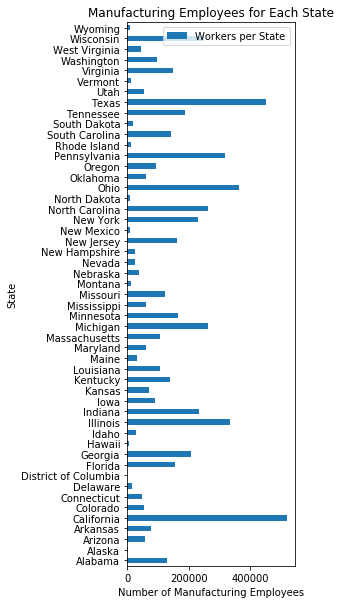

In [12]:
plt.figure()
state_job_ind.plot(kind = "barh",figsize=(3,10))

plt.title("Manufacturing Employees for Each State")
plt.ylabel("State")
plt.xlabel("Number of Manufacturing Employees")

In [13]:
total_job_total_cancer = pd.merge(job_lab_df,cancer_rate_df, on='State')
total_job_total_cancer.head()

,State,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Alabama,128315,2181837,5.881053,451.9,26110.0,179.0,10332.0,39.571046
1,Alaska,3239,353728,0.915675,413.0,2784.0,164.9,977.0,35.093391
2,Arizona,56602,3252711,1.740148,387.0,30448.0,144.1,11508.0,37.795586
3,Arkansas,76421,1327435,5.757043,467.8,16551.0,185.2,6623.0,40.015709
4,California,517711,19192788,2.697425,404.8,165242.0,145.3,58588.0,35.455877


In [14]:
total_job_total_cancer["Workforce Percentage"] = pd.Series(job_lab_df["Manufacturing Percentage"])
total_job_total_cancer.head()

,State,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient,Workforce Percentage
0,Alabama,128315,2181837,5.881053,451.9,26110.0,179.0,10332.0,39.571046,5.881053
1,Alaska,3239,353728,0.915675,413.0,2784.0,164.9,977.0,35.093391,0.915675
2,Arizona,56602,3252711,1.740148,387.0,30448.0,144.1,11508.0,37.795586,1.740148
3,Arkansas,76421,1327435,5.757043,467.8,16551.0,185.2,6623.0,40.015709,5.757043
4,California,517711,19192788,2.697425,404.8,165242.0,145.3,58588.0,35.455877,2.697425


In [15]:
#This takes the dataframe that has the total figures on manufacutring per state, including workforce
#percentage and combines it with Rupesh's overall cancer incidence and death dataframe.
total_job_total_cancer = total_job_total_cancer[['State','Workers per State','Workforce Percentage','Incidence Rate','Average Annual Count_x','Death Rate','Cancer Death_per_hundred_cancer_patient']]
total_job_total_cancer.head()

,State,Workers per State,Workforce Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Cancer Death_per_hundred_cancer_patient
0,Alabama,128315,5.881053,451.9,26110.0,179.0,39.571046
1,Alaska,3239,0.915675,413.0,2784.0,164.9,35.093391
2,Arizona,56602,1.740148,387.0,30448.0,144.1,37.795586
3,Arkansas,76421,5.757043,467.8,16551.0,185.2,40.015709
4,California,517711,2.697425,404.8,165242.0,145.3,35.455877


In [16]:
total_job_total_cancer.to_csv("CSV Files/Total Workers with Cancer Information", header=True)

Text(0.5, 0, 'Total Manufacturing Employees')

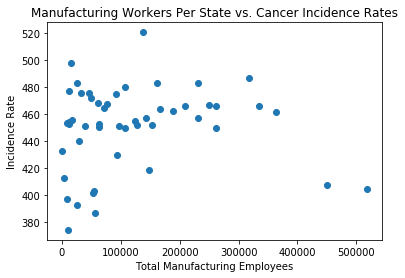

In [17]:
#Comparing manufacturing workers per state and the incidence rate of cancer per state.
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

In [18]:
#Determining the pearson correlation between workers per state and cancer incidence rates
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Indicence Rate is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Cancer Indicence Rate is 0.06


Text(0.5, 0, 'Manufacturing Workforce Percentage')

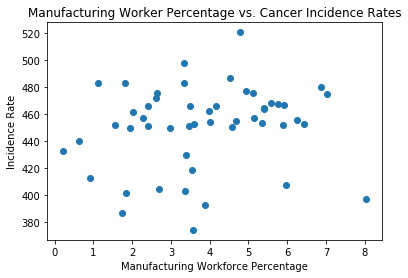

In [19]:
#Calculating Incidence Rates verse Workforce Percentage rather than total employment figures.
plt.figure()
plt.scatter(total_job_total_cancer["Workforce Percentage"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Worker Percentage vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Manufacturing Workforce Percentage")

In [20]:
#Determining the pearson correlation between percentage of workers in manufacturing and incidence rates.
x_axis= total_job_total_cancer["Workforce Percentage"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between percentage of workers and Incidence Rate is {round(correlation[0],2)}")


The pearson correlation between percentage of workers and Incidence Rate is 0.16


In [21]:
#Determining the pearson correlation between workers per state and cancer deaths per hunder cancer patients
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")


The pearson correlation between Workers per State and Cancer Death Rate is 0.01


In [22]:
#This is the dataframe that has employment figures for specific manufacturing fields per state
st_in_brk_df.head()

,Job Category,People Employed,State,Year,NAICS Code
0,Basic chemical manufacturing,4474,New Jersey,2016,3251
1,Basic chemical manufacturing,7003,Ohio,2016,3251
2,Basic chemical manufacturing,4631,New York,2016,3251
3,Basic chemical manufacturing,820,New Mexico,2016,3251
4,Basic chemical manufacturing,2363,Missouri,2016,3251


In [23]:
#Merging the workforce percentages with the specific manufacturing industry figures
merged_data = pd.merge(st_in_brk_df,job_lab_df,on="State",how="left")
merged_data.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage
0,Basic chemical manufacturing,4474,New Jersey,2016,3251,161424,4515938,3.574540
1,Basic chemical manufacturing,7003,Ohio,2016,3251,364242,5673884,6.419624
2,Basic chemical manufacturing,4631,New York,2016,3251,230548,9539259,2.416833
3,Basic chemical manufacturing,820,New Mexico,2016,3251,10553,935358,1.128231
4,Basic chemical manufacturing,2363,Missouri,2016,3251,124148,3093755,4.012858


In [24]:
st_in_brk_df = merged_data
st_in_brk_df["Manufacturing Percentage"] = (st_in_brk_df["People Employed"]  / st_in_brk_df['Labor Force']) *100
st_in_brk_df.tail()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage
1360,Wood product manufacturing,2814,Montana,2016,321,12495,519979,0.541176
1361,Wood product manufacturing,11388,Washington,2016,321,97028,3661925,0.310984
1362,Wood product manufacturing,13134,Virginia,2016,321,147694,4262681,0.308116
1363,Wood product manufacturing,478,Wyoming,2016,321,8951,302608,0.157960
1364,Wood product manufacturing,14054,Alabama,2016,321,128315,2181837,0.644136


In [25]:
st_in_brk_df.to_csv("CSV Files/Total Worker per in All Categories", header=True)

In [26]:
#Creating a dataframe that lists job figures of petrolium and coal manufacturing jobs per state


petro_coal_manu = st_in_brk_df.loc[st_in_brk_df["NAICS Code"]==3241]

#petro_coal_manu.sort_values("State", ascending = True)

In [27]:
#Merging the petro & coal specific dataframe with the cancer rate dataframe.
pc_cancer = pd.merge(petro_coal_manu,cancer_rate_df, on="State" )
pc_cancer.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Petroleum and coal products manufacturing,0,Idaho,2016,3241,28172,805716,0.000000,440.5,7924.0,154.8,2761.0,34.843513
1,Petroleum and coal products manufacturing,1016,Missouri,2016,3241,124148,3093755,0.032840,455.2,32947.0,175.6,12920.0,39.214496
2,Petroleum and coal products manufacturing,137,Maine,2016,3241,31611,690121,0.019852,475.9,8700.0,174.1,3267.0,37.551724
3,Petroleum and coal products manufacturing,382,Iowa,2016,3241,91133,1690916,0.022591,475.2,17806.0,165.6,6479.0,36.386611
4,Petroleum and coal products manufacturing,243,Connecticut,2016,3241,49562,1887269,0.012876,472.4,20843.0,145.8,6657.0,31.938780


In [28]:
pc_cancer.to_csv("CSV Files/Petroleum & Coal Manufacturing with Cancer Data", header=True)

Text(0.5, 0, 'Total Petroleum & Coal Employees')

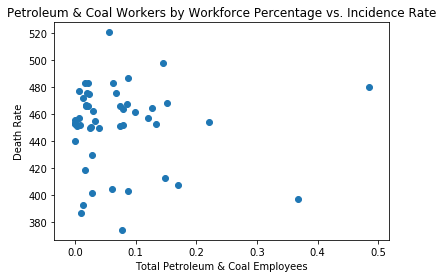

In [29]:
#figure of coal and petroleum workers by percentage of workforce compared to incidence rates
plt.figure()
plt.scatter(pc_cancer["Manufacturing Percentage"],pc_cancer["Incidence Rate"])

plt.title("Petroleum & Coal Workers by Workforce Percentage vs. Incidence Rate")
plt.ylabel("Death Rate")
plt.xlabel("Total Petroleum & Coal Employees")

In [30]:
x_axis= pc_cancer["Manufacturing Percentage"]
y_axis= pc_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Coal & Petroleum Workers per State and Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between Coal & Petroleum Workers per State and Incidence Rate is -0.04


In [31]:
#Creating a dataframe that lists job figures of chemical manufacturing jobs per state

chemical_manu = st_in_brk_df.loc[st_in_brk_df["Job Category"]=="Chemical manufacturing"]


In [32]:
#Merging chemical manufacturing job dataframe with the cancer information dataframe.
chem_cancer = pd.merge(chemical_manu,cancer_rate_df, on="State" )
chem_cancer.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Chemical manufacturing,4185,Oregon,2016,325,92974,2053854,0.203763,429.8,20790.0,162.8,7933.0,38.157768
1,Chemical manufacturing,20118,Georgia,2016,325,208481,4993511,0.402883,466.4,49003.0,165.6,16650.0,33.977512
2,Chemical manufacturing,20697,Indiana,2016,325,231759,3295293,0.628078,457.1,34242.0,178.4,13416.0,39.179954
3,Chemical manufacturing,20305,South Carolina,2016,325,143099,2289830,0.886747,457.3,26730.0,171.8,9942.0,37.194164
4,Chemical manufacturing,21011,Louisiana,2016,325,107111,2089577,1.005515,480.6,24888.0,183.0,9346.0,37.552234


In [33]:
chem_cancer.to_csv("CSV Files/Chemical Manufacturing with Cancer Data", header=True)

Text(0.5, 0, 'Workforce Percentage of Chemical Manufacture Employees')

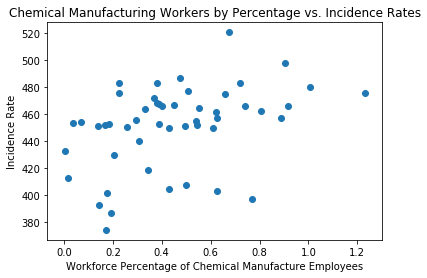

In [34]:
#figure of chemical manufacturer workers compared to incidence rates of all states.
plt.figure()
plt.scatter(chem_cancer["Manufacturing Percentage"],chem_cancer["Incidence Rate"])

plt.title("Chemical Manufacturing Workers by Percentage vs. Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Workforce Percentage of Chemical Manufacture Employees")

In [35]:
#Figuring out the pearson correlation
x_axis= chem_cancer["Manufacturing Percentage"]
y_axis= chem_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Chemical Manufacturing Workers and Incidence Rates is {round(correlation[0],2)}")

The pearson correlation between Chemical Manufacturing Workers and Incidence Rates is 0.4


In [36]:
#Do comparisons with top 10 bottom 20 and industries. Done. That's below.
#See about comparing specific industries.

In [37]:
#Creating a dataframe that has the lowest deaths per 100 cancer patients.
dx = cancer_rate_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = True)
low_can_death = dx.head(10)
low_can_death.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
44,Utah,402.8,10143.0,127.0,3021.0,29.784088
5,New York,482.9,111527.0,151.0,35491.0,31.822787
11,Connecticut,472.4,20843.0,145.8,6657.0,31.938780
4,New Jersey,483.3,50921.0,153.5,16407.0,32.220498
45,Colorado,401.4,22701.0,138.9,7520.0,33.126294


In [38]:
#Merging low cancer death rates with job figures
bot_can_death = pd.merge(job_lab_df,low_can_death, on ='State')
bot_can_death = bot_can_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
bot_can_death.head()

,State,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
8,Utah,54867,1522330,3.604146,402.8,10143.0,127.0,3021.0,29.784088
7,New York,230548,9539259,2.416833,482.9,111527.0,151.0,35491.0,31.822787
1,Connecticut,49562,1887269,2.626123,472.4,20843.0,145.8,6657.0,31.938780
6,New Jersey,161424,4515938,3.574540,483.3,50921.0,153.5,16407.0,32.220498
0,Colorado,53580,2899662,1.847802,401.4,22701.0,138.9,7520.0,33.126294


Text(0.5, 0, 'Percentage of Manufacturing Employees')

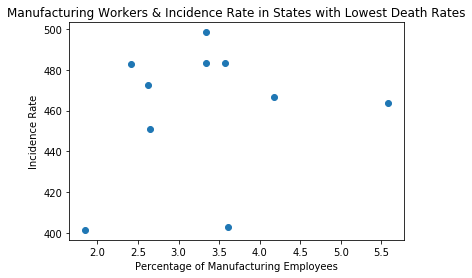

In [39]:
#Making a plot for the number of manufacturing workers verse cancer deaths.
plt.figure()
plt.scatter(bot_can_death["Manufacturing Percentage"],bot_can_death["Incidence Rate"])

plt.title("Manufacturing Workers & Incidence Rate in States with Lowest Death Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Percentage of Manufacturing Employees")

In [40]:
#Calculating the pearson correlation between workers pers state and cancer death rates in the bottom 10 states.

x_axis= bot_can_death["Manufacturing Percentage"]
y_axis= bot_can_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of manufacturing workers and Incidence Rates is {round(correlation[0],2)}")

The pearson correlation between the percentage of manufacturing workers and Incidence Rates is 0.22


In [41]:
dx2 = dx.tail(20)

In [42]:
#Creating a dataframe that has the 20 states with the highest death per 100 patients
high_can_death = dx2.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
high_can_death

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
12,Mississippi,468.6,15923.0,193.6,6522.0,40.959618
8,West Virginia,476.0,11653.0,189.4,4756.0,40.813524
28,Oklahoma,452.9,19837.0,183.7,8082.0,40.742048
13,Arkansas,467.8,16551.0,185.2,6623.0,40.015709
47,Nevada,392.6,12409.0,162.3,4934.0,39.761463
30,Alabama,451.9,26110.0,179.0,10332.0,39.571046
20,Tennessee,462.6,35692.0,184.0,14111.0,39.535470
25,Missouri,455.2,32947.0,175.6,12920.0,39.214496
23,Indiana,457.1,34242.0,178.4,13416.0,39.179954
21,Ohio,461.9,64858.0,177.1,25317.0,39.034506


In [43]:
#combining the highest cancer death states with the total industry figures
top_can_ind = pd.merge(job_lab_df, high_can_death, on= "State")
top_can_ind = top_can_ind.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
top_can_ind.head()

,State,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
9,Mississippi,60455,1290731,4.683780,468.6,15923.0,193.6,6522.0,40.959618
19,West Virginia,45957,775724,5.924401,476.0,11653.0,189.4,4756.0,40.813524
14,Oklahoma,62254,1835037,3.392520,452.9,19837.0,183.7,8082.0,40.742048
2,Arkansas,76421,1327435,5.757043,467.8,16551.0,185.2,6623.0,40.015709
11,Nevada,25744,1427057,1.803992,392.6,12409.0,162.3,4934.0,39.761463


Text(0.5, 0, 'Precentage of Workforce in Manufacturing')

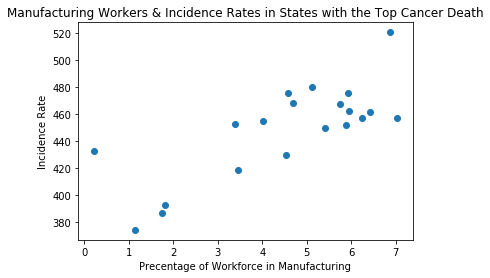

In [44]:
plt.figure()
plt.scatter(top_can_ind["Manufacturing Percentage"],top_can_ind["Incidence Rate"])

plt.title("Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Manufacturing")

In [45]:
#Calculating the pearson correlation between workers pers state and cancer death rates in the top 20 states.

x_axis= top_can_ind["Manufacturing Percentage"]
y_axis= top_can_ind["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in manufacturing and the Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between the percentage of a workforce in manufacturing and the Incidence Rate is 0.77


In [46]:
#combining the highest cancer death states with the total petroleum & coal manufacturing industry figures industry figures

top_pc_death = pd.merge(petro_coal_manu, high_can_death, on= "State")
top_pc_death = top_pc_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
top_pc_death.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
13,Petroleum and coal products manufacturing,1963,Mississippi,2016,3241,60455,1290731,0.152084,468.6,15923.0,193.6,6522.0,40.959618
15,Petroleum and coal products manufacturing,519,West Virginia,2016,3241,45957,775724,0.066905,476.0,11653.0,189.4,4756.0,40.813524
5,Petroleum and coal products manufacturing,2461,Oklahoma,2016,3241,62254,1835037,0.134112,452.9,19837.0,183.7,8082.0,40.742048
9,Petroleum and coal products manufacturing,1137,Arkansas,2016,3241,76421,1327435,0.085654,467.8,16551.0,185.2,6623.0,40.015709
18,Petroleum and coal products manufacturing,175,Nevada,2016,3241,25744,1427057,0.012263,392.6,12409.0,162.3,4934.0,39.761463


Text(0.5, 0, 'Precentage of Workforce in Coal & Petroleum Manufacturing')

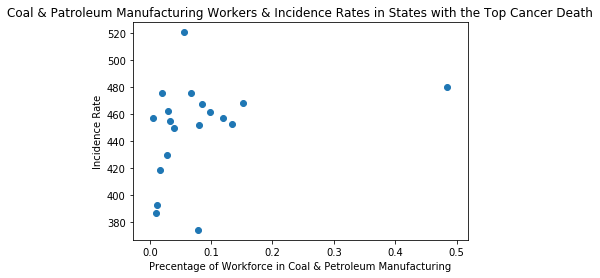

In [47]:
plt.figure()
plt.scatter(top_pc_death["Manufacturing Percentage"],top_pc_death["Incidence Rate"])

plt.title("Coal & Patroleum Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Coal & Petroleum Manufacturing")

In [48]:
#Calculating the pearson correlation between coal & petroleum workers and incidence rates in cancer death rates in the top 20 states.

x_axis= top_pc_death["Manufacturing Percentage"]
y_axis= top_pc_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is 0.31


In [49]:
top_chem_death = pd.merge(chem_cancer, high_can_death, on= "State")
top_chem_death = top_chem_death.sort_values("Cancer Death_per_hundred_cancer_patient_x", ascending = False)
top_chem_death.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
13,Petroleum and coal products manufacturing,1963,Mississippi,2016,3241,60455,1290731,0.152084,468.6,15923.0,193.6,6522.0,40.959618
15,Petroleum and coal products manufacturing,519,West Virginia,2016,3241,45957,775724,0.066905,476.0,11653.0,189.4,4756.0,40.813524
5,Petroleum and coal products manufacturing,2461,Oklahoma,2016,3241,62254,1835037,0.134112,452.9,19837.0,183.7,8082.0,40.742048
9,Petroleum and coal products manufacturing,1137,Arkansas,2016,3241,76421,1327435,0.085654,467.8,16551.0,185.2,6623.0,40.015709
18,Petroleum and coal products manufacturing,175,Nevada,2016,3241,25744,1427057,0.012263,392.6,12409.0,162.3,4934.0,39.761463


Text(0.5, 0, 'Precentage of Workforce in Chemical Manufacturing')

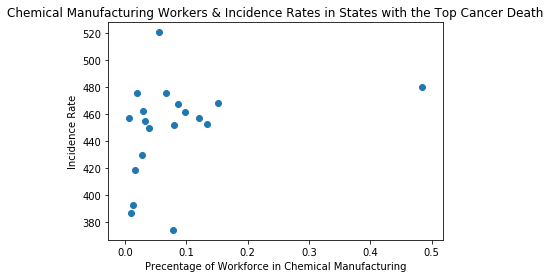

In [50]:
plt.figure()
plt.scatter(top_chem_death["Manufacturing Percentage"],top_chem_death["Incidence Rate_x"])

plt.title("Chemical Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Chemical Manufacturing")

In [51]:
x_axis= top_chem_death["Manufacturing Percentage"]
y_axis= top_chem_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in chemical manufacturing and the Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between the percentage of a workforce in chemical manufacturing and the Incidence Rate is 0.31
